# Classifying Images with CNNs

In this exercise you will design a Convolutional Neural Network (CNN) for Fashion Mnist.

CNNs are the workhorses of modern computer vision.

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [6]:
from keras.datasets import fashion_mnist

In [13]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255

### Exercise 1

Why are we reshaping the data?

What's the new shape?

In [14]:
X_train.shape

(60000, 28, 28, 1)

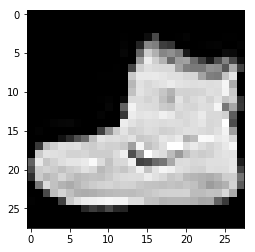

In [15]:
plt.imshow(X_train[0, :, :, 0], cmap='gray')

## Simplest CNN

Let's build a convolutional model! For this, we need to have the data in its original shape. Also note that when we reshape the data below, we add a dimension of 1 - this is the number of **channels** in the image, which is just 1 because these are grayscale images. If they were color, this would be 3 for RGB.

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten

In [19]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 33s 556us/step - loss: 0.4707 - acc: 0.8337


## Exercise 2

- Why are we using the `sparse_categorical_crossentropy` above?

Because our labels have not been 1-hot encoded

## Exercise 3: A better CNN

Improve the CNN design above. It is up to you what the model will be. Here are some things you need to decide:
* how many convolutional layers?
* what spatial size will your convolutions be?
* how many channels will your convolutions be?
* what nonlinearity will you use?
* will you use pooling? what type?
* how many fully-connected layers will you have?
* will you use dropout or batch normalization or regularization?
* what batch size will you use for training?

Keras provides a special layer called `Flatten` to flatten the convolutional features into a vector before the fully-connected layers. You should look at the documentation for Keras's convolutional layers: http://keras.io/layers/convolutional/. In particular, you may want to look at `Conv2D`, `MaxPooling2D`, `AveragePooling2D`, `Flatten`, and `Dropout`. For this problem, you make want to use the `'rmsprop'` optimizer - it is an algorithm that adapts the learning rate during learning for you automatically.

Can you get to 98% accuracy? You shouldn't need more than a few epochs to do pretty well.

Suggestions:
* Try using at least 2 convolutional layers. This should get you off to a good start and it will come in handy later.

In [21]:
model = Sequential()

# Design a CNN
model.add(Conv2D(32, (3, 3), padding='valid', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Fit your model
model.fit(X_train, y_train, batch_size=128, epochs=3,
          verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 165s 3ms/step - loss: 0.5314 - acc: 0.8128 - val_loss: 0.3460 - val_acc: 0.8767
Epoch 2/2
60000/60000 [==============================] - 150s 2ms/step - loss: 0.3486 - acc: 0.8772 - val_loss: 0.2954 - val_acc: 0.8960


In [22]:
score = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.295444204044342
Test accuracy: 0.896
